# Heart Disease Prediction


**Chosen Models:**

(1) Logistic Regression

(2) Random Forest Classifier

(3) Support Vector Machine

**Included Tasks in this Project:**

**(1) Data Preprocessing**

*   Handling Missing Values
*   Outlier Detection
*   Data Encoding
*   Feature Selection
*   Train-Test Split
*   Feature Scaling

**(2) Model Develeopment and Evaluation**
*   Model Implementation
*   Model Training
*   Making Predictions
*   Model Evaluation using Classification Reports

**(3) Model Optimization**
*   Hyperparameter tuning using GridSearchCV
*   Cross-validation to ensure generalization
*   Model Performance Evaluation(Accuracy, Confusion Matrix, Classification Reports)
*   Model Comparison and Selection of the Best-Performing Model

Data Loading

In [96]:
import numpy as np
import pandas as pd

In [120]:
df=pd.read_csv("/content/heart_disease_uci.csv")

Data Preprocessing

In [121]:
#Checking the head of a dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [122]:
#Checking the summary informaiton of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [123]:
#Checking for missing values in each column
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [124]:
#Imputing 'slope' ,'ca','thal','fbs','trestbps' columns with mode as they have a high percentage of missing values
from sklearn.impute import SimpleImputer


cols=['slope' ,'ca','thal','fbs','trestbps']

impute_mode=SimpleImputer(strategy='most_frequent')
df[cols]=impute_mode.fit_transform(df[cols])

df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,30
fbs,0
restecg,2
thalch,55


In [125]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [126]:
#Dropping missing values
df=df.dropna()

In [127]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [128]:
#Dropping 'id','dataset' columns as they do not give pedictive value for the models
df=df.drop(['id','dataset'], axis=1)

In [129]:
#Changing the target feature 'num' into a binary feature (0,1) | 0=absence of heart disease, 1=presence of heart disease
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else x)

In [107]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,flat,0.0,normal,1
914,46,Male,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,flat,0.0,normal,1
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,1


In [130]:
df.num.unique()

array([0, 1])

In [131]:
df.shape

(828, 14)

In [132]:
#Checking for unique values in each column
for i in df.columns:
  print(i,':',df[i].unique(),'\n')

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75] 

sex : ['Male' 'Female'] 

cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'] 

trestbps : [145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 98.0 190.0 113.0 92.0 95.0 80.0 185.0 116.0 0.0 96.0 127.0] 

chol : [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       828 non-null    int64  
 1   sex       828 non-null    object 
 2   cp        828 non-null    object 
 3   trestbps  828 non-null    object 
 4   chol      828 non-null    float64
 5   fbs       828 non-null    object 
 6   restecg   828 non-null    object 
 7   thalch    828 non-null    float64
 8   exang     828 non-null    object 
 9   oldpeak   828 non-null    float64
 10  slope     828 non-null    object 
 11  ca        828 non-null    object 
 12  thal      828 non-null    object 
 13  num       828 non-null    int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 129.3+ KB


In [133]:
#Changing the data types of the features 'trestbps' and 'ca'
df['trestbps']=df['trestbps'].astype(int)
df['ca']=df['ca'].astype(int)

In [134]:
#Detecting outliers using zscore
from scipy import stats

threshold=3
numeric_cols=df.select_dtypes(include=np.number)
zscore=stats.zscore(numeric_cols)
out_zscore=(zscore>threshold).sum()
out_zscore

,0
age,0
trestbps,7
chol,2
thalch,0
oldpeak,6
ca,20
num,0


<Axes: xlabel='trestbps'>

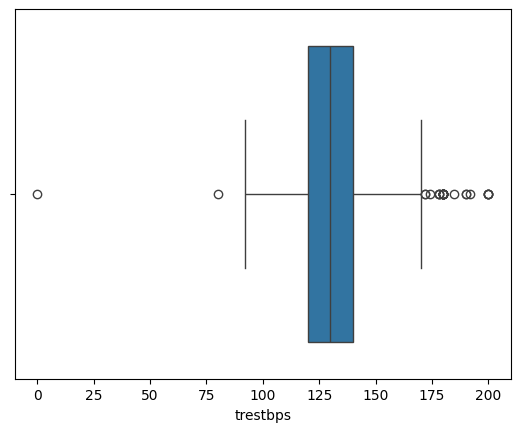

In [114]:
#Visualizing outliers in 'trestbbps' column based on zscore using box-plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['trestbps'])

In [ ]:
df.trestbps.unique()

array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
       124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
       118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
       192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164,  98, 190,
       113,  92,  95,  80, 185, 116,   0,  96, 127])

In [ ]:
df.trestbps.value_counts()

,count
trestbps,
120,131
130,111
140,93
110,55
150,53
...,...
92,1
185,1
0,1


In [135]:
#Removing a row where 'trestbps' is 0, as it do not make sense in a medical context
df=df[df['trestbps']!=0]

<Axes: xlabel='chol'>

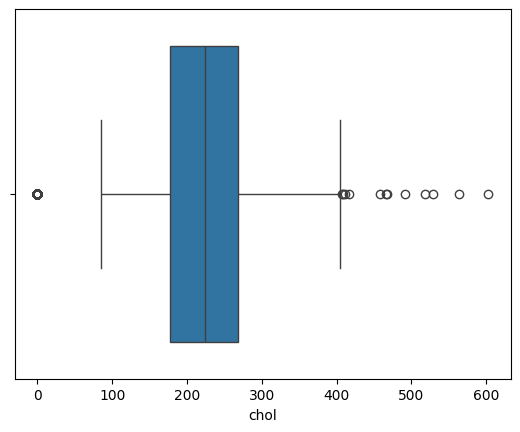

In [36]:
#Visualizing outliers in 'chol' column based on zscore using box-plot

sns.boxplot(x=df['chol'])

In [ ]:
df.chol.unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [ ]:
df.chol.value_counts()

,count
chol,
0.0,155
254.0,10
220.0,10
223.0,9
230.0,9
...,...
458.0,1
349.0,1
384.0,1


In [136]:
#Removing rows where 'chol' >350, as such cholesterol levels are considered extremely rare and uncommon for a living person, and may be due to erroneous data entry

df=df[df['chol']< 350]

In [137]:
# Replacing rows where 'chol' = 0 with the median value, as it is unrealistic in a medical context.
chol_median = df['chol'].median()
df.loc[df['chol'] == 0, 'chol'] = chol_median

<Axes: xlabel='oldpeak'>

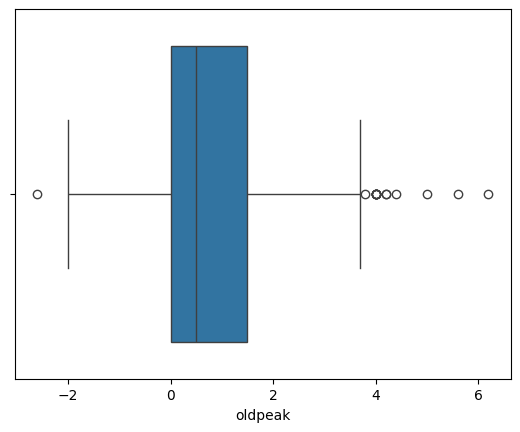

In [39]:
#Visualizing outliers in 'oldpeak' column based on zscore using box-plot

sns.boxplot(x=df['oldpeak'])

In [40]:
df.oldpeak.unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  3.1,  0.4,  1.3,  0.6,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  5.6,  4. ,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -1.1, -1.5, -0.1,
       -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [41]:
df.oldpeak.value_counts()

,count
oldpeak,
0.0,343
1.0,75
2.0,69
1.5,44
3.0,28
0.5,19
2.5,16
1.2,15
1.4,15


In [138]:
# Removing rows where 'oldpeak' > 5, as such values are uncommon in a medical context

df=df[df['oldpeak']<=5]

<Axes: xlabel='ca'>

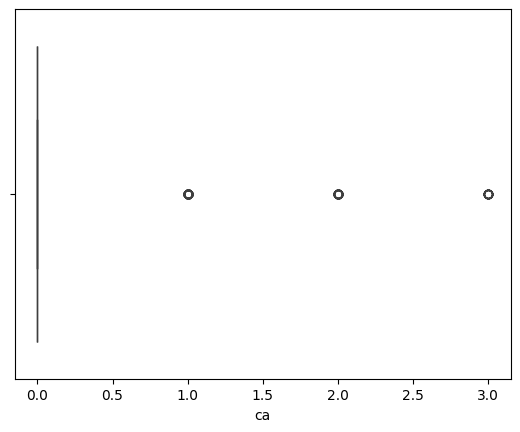

In [43]:
#Visualizing outliers in 'ca' column based on zscore using box-plot

sns.boxplot(x=df['ca'])

In [44]:
df.ca.unique()

array([0, 3, 2, 1])

In [45]:
df.ca.value_counts()

,count
ca,
0,677
1,65
2,40
3,18


In [139]:
#Checking the shape of dataset afer outlier removal
df.shape

(800, 14)

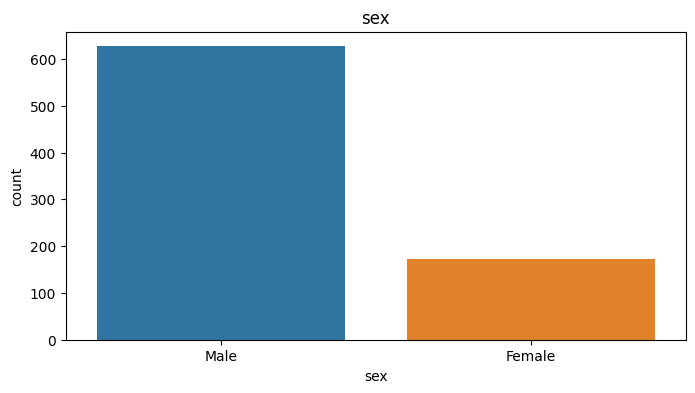

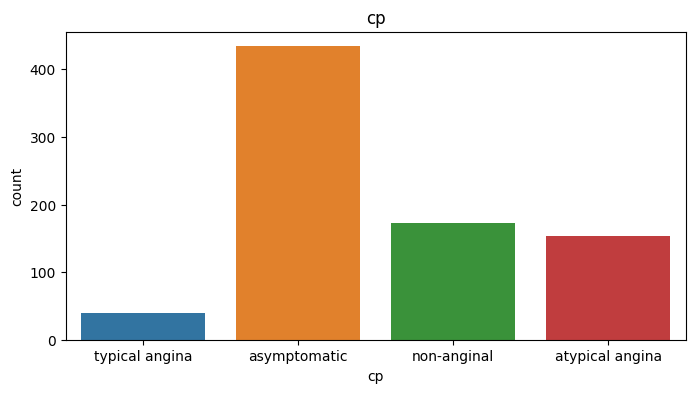

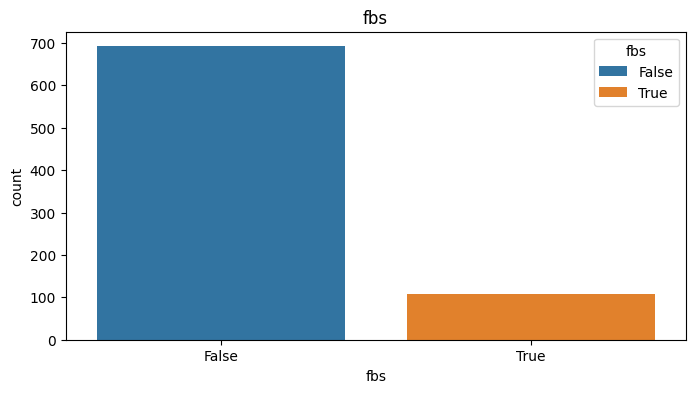

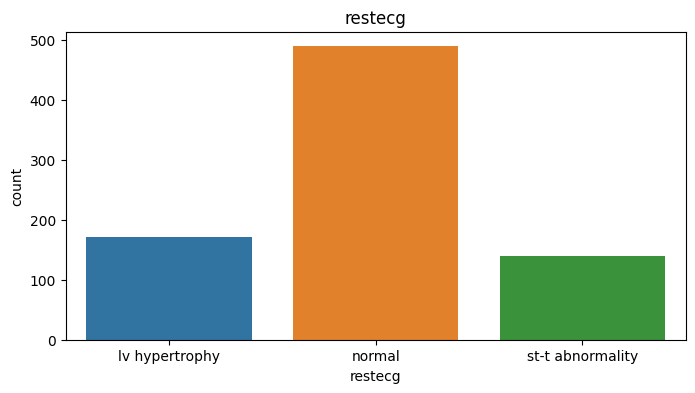

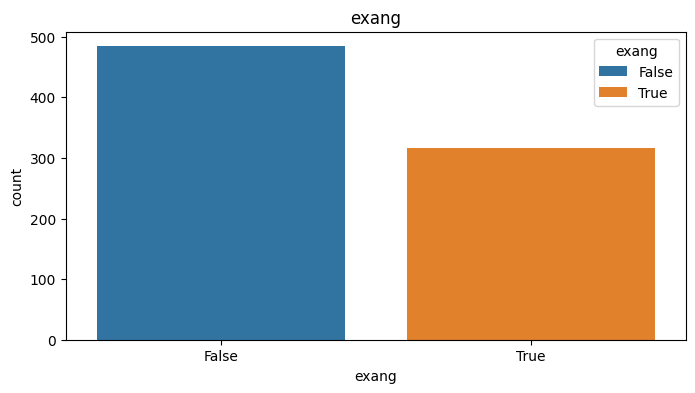

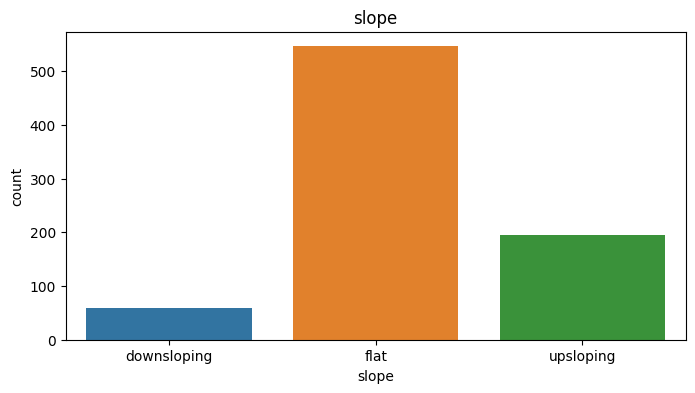

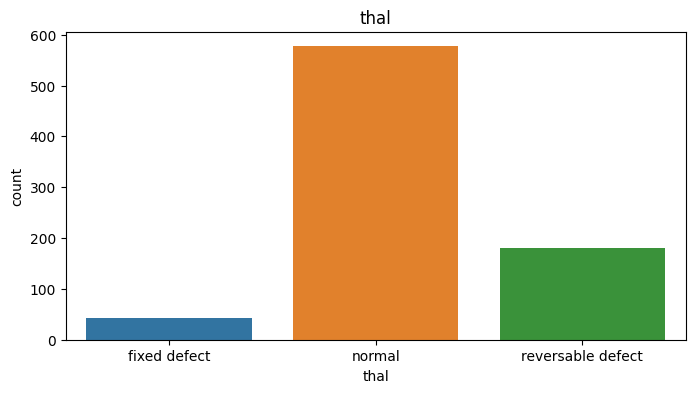

In [140]:
#Checking the distribution of all categorical features using countplot
cat_cols=df.select_dtypes('object')

for cols in cat_cols:
  plt.figure(figsize=(8,4))
  sns.countplot(x=df[cols], hue=df[cols])
  plt.title(cols)
  plt.show()

In [141]:
# Using Label Encoding for binary categorical features
# Using One-Hot Encoding for nominal categorical features

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

bc_col=cat_cols[['sex','fbs','exang']]
nc_cols=cat_cols.drop(['sex','fbs','exang'], axis=1)

lb_encoder = LabelEncoder()
for col in bc_col.columns:
  df[col]=lb_encoder.fit_transform(df[col])

df_encoded=pd.get_dummies(df, columns=nc_cols.columns, drop_first=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,fixed defect,0
1,67,Male,asymptomatic,160,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3,normal,1
2,67,Male,asymptomatic,120,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2,reversable defect,1
3,37,Male,non-anginal,130,250.0,False,normal,187.0,False,3.5,downsloping,0,normal,0
4,41,Female,atypical angina,130,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,normal,0


In [ ]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233.0,1,150.0,0,2.3,0,0,False,False,True,False,False,False,False,False,False
1,67,1,160,286.0,0,108.0,1,1.5,3,1,False,False,False,False,False,True,False,True,False
2,67,1,120,229.0,0,129.0,1,2.6,2,1,False,False,False,False,False,True,False,False,True
3,37,1,130,250.0,0,187.0,0,3.5,0,0,False,True,False,True,False,False,False,True,False
4,41,0,130,204.0,0,172.0,0,1.4,0,0,True,False,False,False,False,False,True,True,False


In [142]:
#Checking the shaped of the encoded dataframe
df_encoded.shape

(800, 19)

<Axes: >

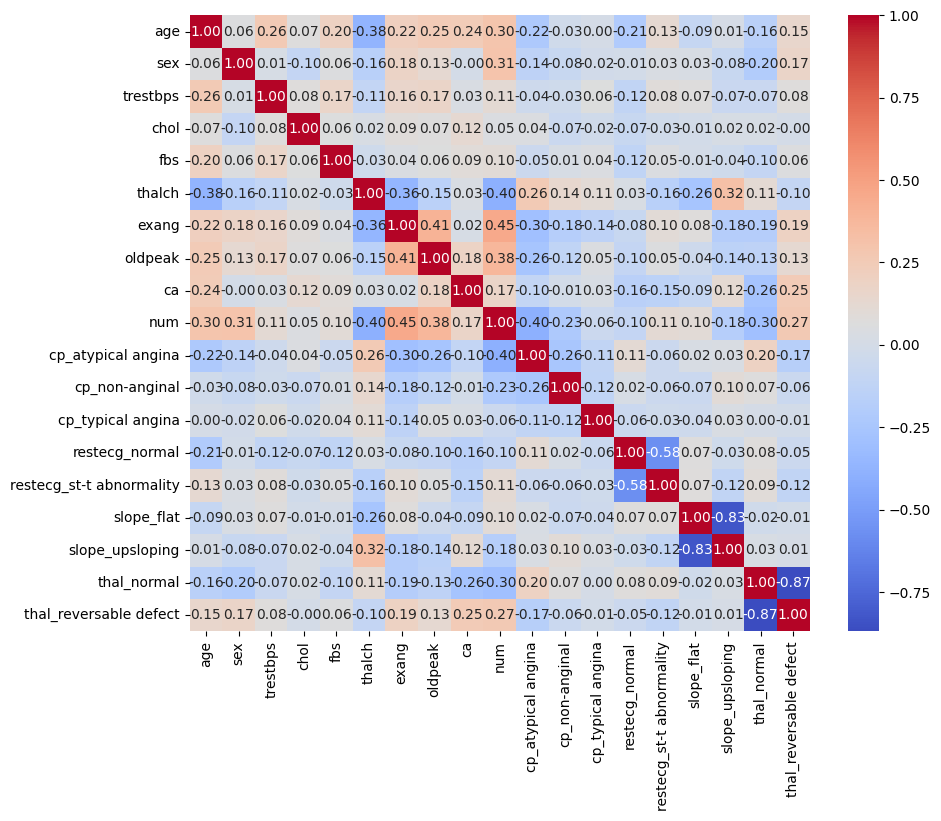

In [143]:
#Checking the correlation of features using a heatmap
corr=df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [144]:
#Selecting features based on the correlation matrix
# Removing features that are highly correlated with eachother (> 0.8) and weakly correlated with the target (< 0.15)
target = 'num'

corr = df_encoded.corr().abs()

threshold_high_corr = 0.8
high_corr_mask = (corr > threshold_high_corr) & (corr != 1)

columns_to_drop = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if high_corr_mask.iloc[i, j]:
            colname = corr.columns[i]
            columns_to_drop.add(colname)

corr_with_target = corr[target]

threshold_weak_corr = 0.15
weak_corr_columns = corr_with_target[corr_with_target < threshold_weak_corr].index.tolist()

columns_to_drop.update(weak_corr_columns)

df_encoded_selected = df_encoded.drop(columns=columns_to_drop, axis=1)
print("Selected features:\n", df_encoded_selected.columns)

Selected features:
 Index(['age', 'sex', 'thalch', 'exang', 'oldpeak', 'ca', 'num',
       'cp_atypical angina', 'cp_non-anginal', 'thal_normal'],
      dtype='object')


In [145]:
#Checking the shape of dataframe with the selected features
df_encoded_selected.shape

(800, 10)

In [146]:
#Splitting dataframe into features(X) and target(y)
X = df_encoded_selected.drop('num',axis=1)
y = df_encoded_selected['num']

In [147]:
#Splitting of data into training and testing sets (80% training, 20% testing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [148]:
X_train.columns

Index(['age', 'sex', 'thalch', 'exang', 'oldpeak', 'ca', 'cp_atypical angina',
       'cp_non-anginal', 'thal_normal'],
      dtype='object')

In [149]:
X_test.columns

Index(['age', 'sex', 'thalch', 'exang', 'oldpeak', 'ca', 'cp_atypical angina',
       'cp_non-anginal', 'thal_normal'],
      dtype='object')

In [ ]:
y_train.head()

,num
237,1
500,1
806,1
61,0
147,0


In [ ]:
y_test.head()

,num
367,0
160,0
501,1
876,1
277,0


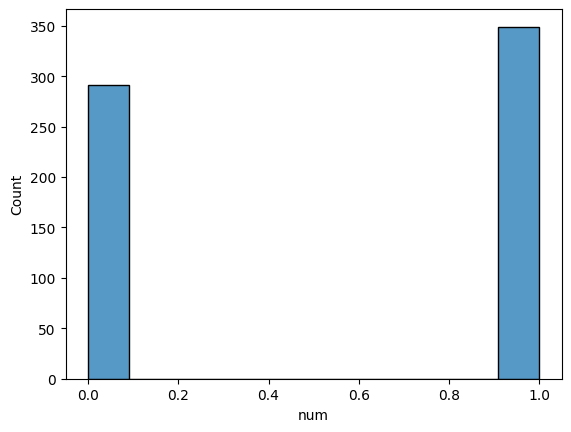

In [150]:
#Checking the distribution of target feature 'num' using countplot
sns.histplot(x=y_train)
plt.show()

In [151]:
#Checking the count of each value of the target feature 'num'
df.num.value_counts()

,count
num,
1,440
0,360


In [153]:
#Installing imbalanced-learn package for handling imbalances
!pip install imbalanced-learn

In [154]:
#Balancing the classes in the target feature using an oversampling method (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original dataset shape:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({1: 349, 0: 291})
Resampled dataset shape: Counter({1: 349, 0: 349})


In [155]:
#Scaling the X_train_resampled and X_test using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resampled)
X_test_scaled=scaler.transform(X_test)

In [156]:
X_train_scaled

array([[ 0.6614965 ,  0.56742374,  0.93654606, ..., -0.53206037,
        -0.58286472,  0.59389661],
       [ 0.6614965 ,  0.56742374,  1.44406391, ..., -0.53206037,
         1.71566396,  0.59389661],
       [-1.51644953,  0.56742374,  0.0776697 , ..., -0.53206037,
        -0.58286472,  0.59389661],
       ...,
       [-0.10078461, -1.76235137, -1.09352534, ...,  1.87948598,
        -0.58286472,  0.59389661],
       [-0.75416842,  0.56742374,  1.87916928, ..., -0.53206037,
        -0.58286472,  0.59389661],
       [ 0.11700999,  0.56742374, -0.03944981, ...,  1.87948598,
        -0.58286472,  0.59389661]])

In [157]:
#Initializing, Training, and Evaluating Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model=LogisticRegression()
lr_model.fit(X_train_scaled, y_train_resampled)

y_pred=lr_model.predict(X_test_scaled)

#Model Evaluation
lr_classification_report=classification_report(y_test, y_pred, zero_division=1)
print("Classification Report for Logistic Regression:\n\n", lr_classification_report)

Classification Report for Logistic Regression:

               precision    recall  f1-score   support

           0       0.81      0.84      0.82        69
           1       0.88      0.85      0.86        91

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160



In [158]:
#Initializing, Training, and Evaluating Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train_resampled)
rf_pred = rf_model.predict(X_test_scaled)

#Model Evaluation
rf_classification_report=classification_report(y_test, rf_pred, zero_division=1)
print("Classification Report for Random Forest Classifier:\n\n", rf_classification_report)

Classification Report for Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.85      0.80      0.82        69
           1       0.85      0.89      0.87        91

    accuracy                           0.85       160
   macro avg       0.85      0.84      0.85       160
weighted avg       0.85      0.85      0.85       160



In [160]:
#Initializing, Training, and Evaluating Support Vector Machine
from sklearn.svm import SVC

svm_model=SVC(C=0.1,kernel='linear', random_state=42, class_weight='balanced',)

svm_model.fit(X_train_scaled, y_train_resampled)
y_pred=svm_model.predict(X_test_scaled)

#Model Evaluation
svm_classification_report=classification_report(y_test, y_pred,zero_division=1)
print("Classification Report for SVM:\n\n",svm_classification_report)


Classification Report for SVM:

               precision    recall  f1-score   support

           0       0.82      0.84      0.83        69
           1       0.88      0.86      0.87        91

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



In [90]:
#Optimizing for Logistic Regression Model using GridSearchCV
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

grid_parameters_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
}

grid_search = GridSearchCV(lr, grid_parameters_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)
print("Best Parameters:", grid_search.best_params_)

# Evaluating on test data
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

print("\nOptimized Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report for Optimized Logistic Regression Model:\n\n",classification_report(y_test, y_pred_lr))

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}

Optimized Logistic Regression Model Accuracy: 0.83125

Classification Report for Optimized Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.78      0.86      0.81        69
           1       0.88      0.81      0.85        91

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.84      0.83      0.83       160



In [161]:
#Optimizing for Random Forest Classifier using GridSearchCV

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

grid_parameters_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf, grid_parameters_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train_resampled)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluating on test data
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("\nOptimized Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Optimized Random Forest Classifier:\n\n",classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Optimized Random Forest Model Accuracy: 0.84375

Classification Report for Optimized Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.84      0.78      0.81        69
           1       0.84      0.89      0.87        91

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



In [162]:
#Optimizing for Support Vector Machine using GridSearchCV

svm = SVC(probability=True)

grid_parameters_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm, grid_parameters_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train_resampled)

print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Evaluating on test data
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

print("\nOptimized SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report for Optimized SVM:\n\n",classification_report(y_test, y_pred_svm))


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Optimized SVM Accuracy: 0.85

Classification Report for Optimized SVM:

               precision    recall  f1-score   support

           0       0.82      0.84      0.83        69
           1       0.88      0.86      0.87        91

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



In [164]:
#Checking training and testing accuracy for Logistic Regression
lr_train_accuracy = best_lr.score(X_train_scaled, y_train_resampled)
lr_test_accuracy = best_lr.score(X_test_scaled, y_test)
print("Logistic Regression - Training Accuracy:", lr_train_accuracy)
print("Logistic Regression - Test Accuracy: ", lr_test_accuracy)

#Checking training and testing accuracy for Random Forest Classifier
rf_train_accuracy = best_rf.score(X_train_scaled, y_train_resampled)
rf_test_accuracy = best_rf.score(X_test_scaled, y_test)
print("\nRandom Forest - Training Accuracy: ",rf_train_accuracy)
print("Random Forest - Test Accuracy: ",rf_test_accuracy)

#Checking training and testing accuracy for Support Vector Machine
svm_train_accuracy = best_svm.score(X_train_scaled, y_train_resampled)
svm_test_accuracy = best_svm.score(X_test_scaled, y_test)
print("\nSVM - Training Accuracy:", svm_train_accuracy)
print("SVM - Test Accuracy:", svm_test_accuracy)


Logistic Regression - Training Accuracy: 0.8108882521489972
Logistic Regression - Test Accuracy:  0.83125

Random Forest - Training Accuracy:  0.9269340974212035
Random Forest - Test Accuracy:  0.84375

SVM - Training Accuracy: 0.8209169054441261
SVM - Test Accuracy: 0.85


In [165]:
#Checking cross-validation scores of the three models
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(best_lr, X_train_scaled, y_train_resampled, cv=5)
rf_cv = cross_val_score(best_rf, X_train_scaled, y_train_resampled, cv=5)
svm_cv = cross_val_score(best_svm, X_train_scaled, y_train_resampled, cv=5)

print("Logistic Regression Cross-Validation Accuracy:",lr_cv)
print("\nRandom Forest Cross-Validation Accuracy:",rf_cv)
print("\nSVM Cross-Validation Accuracy:",svm_cv)

Logistic Regression Cross-Validation Accuracy: [0.83571429 0.79285714 0.79285714 0.84172662 0.79136691]

Random Forest Cross-Validation Accuracy: [0.84285714 0.72857143 0.79285714 0.81294964 0.82014388]

SVM Cross-Validation Accuracy: [0.85       0.8        0.78571429 0.82733813 0.82733813]


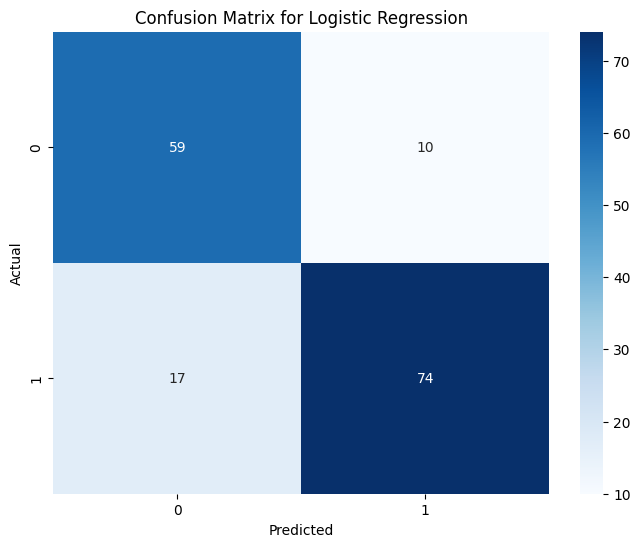

In [174]:
#Checking confusion Matrix for Logistic Regression Model
from sklearn.metrics import confusion_matrix

y_pred_lr = best_lr.predict(X_test_scaled)

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

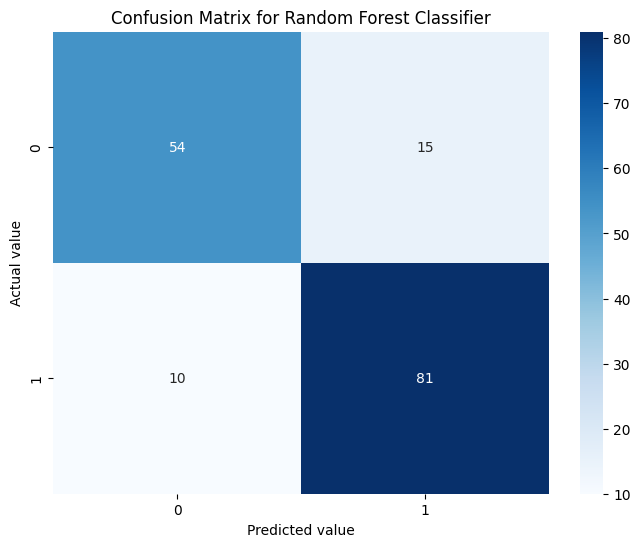

In [175]:
#Checking confusion Matrix for Random Forest Classifier
y_pred_rf = best_rf.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

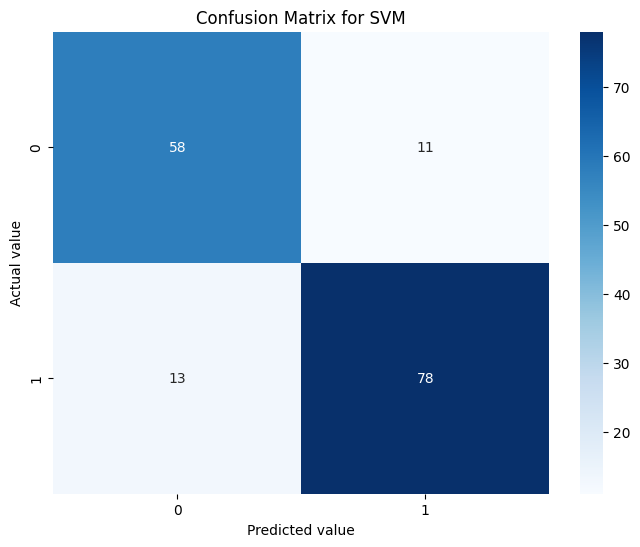

In [176]:
#Checking confusion Matrix for Support Vector Machine
y_pred_svm = best_svm.predict(X_test_scaled)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

In [170]:
#Checking the classification reports of the three models
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.81        69
           1       0.88      0.81      0.85        91

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.84      0.83      0.83       160



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        69
           1       0.84      0.89      0.87        91

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        69
           1       0.88      0.86      0.87        91

    accuracy                           0.85       160
   macro avg  

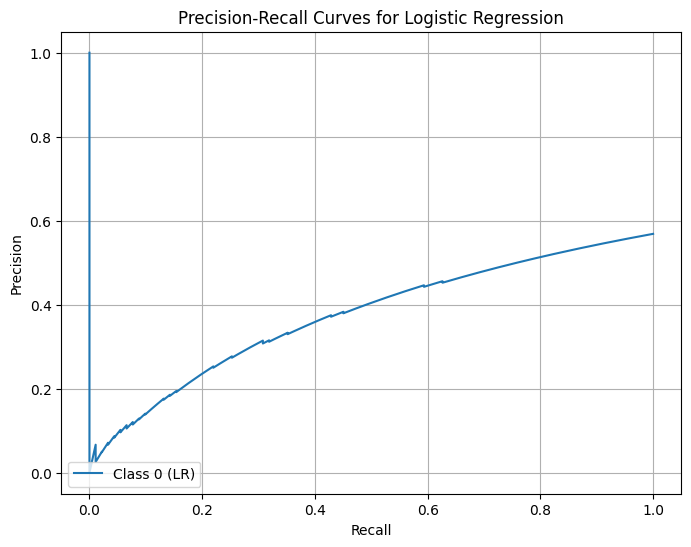

In [171]:
#Checking Precision-Recall curve for Logistic Regression Model
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1])
y_prob_lr_bin = best_lr.predict_proba(X_test_scaled)
plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin[:, i], y_prob_lr_bin[:, i])
    plt.plot(recall_lr, precision_lr, label=f'Class {i} (LR)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

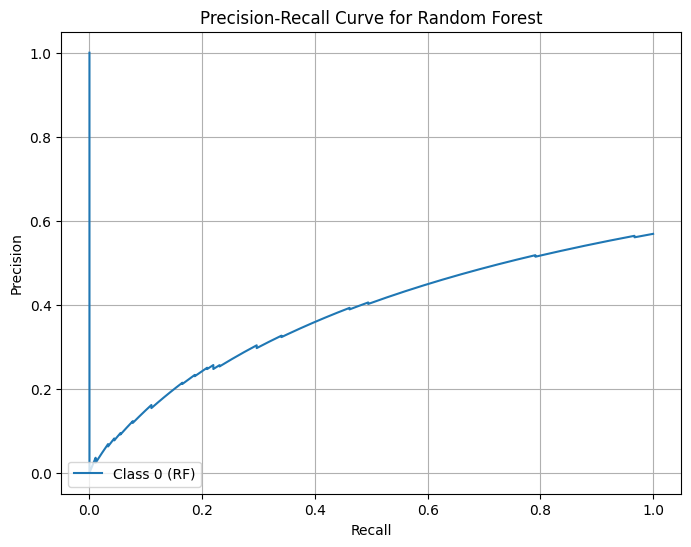

In [172]:
#Checking Precision-Recall curve for Random Forest
y_prob_rf_bin = best_rf.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    precision_rf, recall_rf, _ = precision_recall_curve(y_test_bin[:, i], y_prob_rf_bin[:, i])
    plt.plot(recall_rf, precision_rf, label=f'Class {i} (RF)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

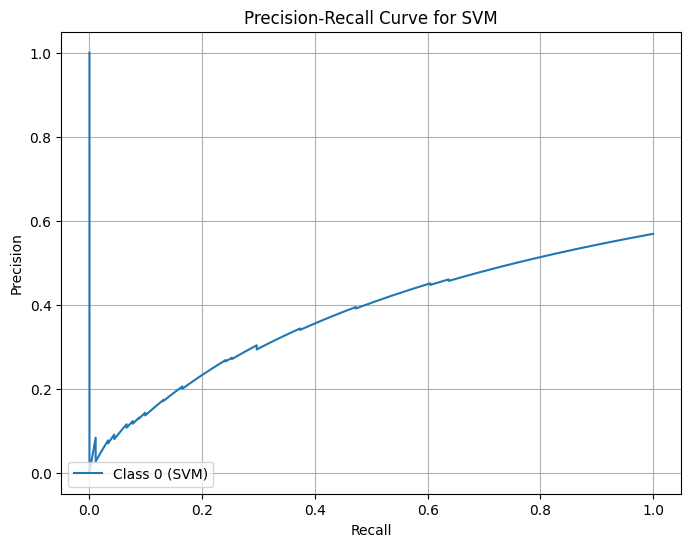

In [173]:
#Checking Precision-Recall curve for Support Vector Machine
y_prob_svm_bin = best_svm.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    precision_svm, recall_svm, _ = precision_recall_curve(y_test_bin[:, i], y_prob_svm_bin[:, i])
    plt.plot(recall_svm, precision_svm, label=f'Class {i} (SVM)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()